In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)

city_data.head()

# Combine the data into a single dataset

# Display the data table for preview


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
combined_cityride_df = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
#combined_cityride_df.head()
#combined_cityride_df = combined_cityride_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
combined_cityride_df = combined_cityride_df.rename(columns={"city": "City", "date": "Date", "fare":"Fare",
                                                            "ride_id": "Ride ID", "driver_count": "Driver Count",
                                                            "type": "Type"})




In [4]:
combined_cityride_df.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
combined_cityride_df.describe()

,Driver Count,Fare,Ride ID
count,2375.000000,2375.000000,2.375000e+03
mean,28.930105,26.753112,4.887270e+12
std,20.666306,12.109465,2.907361e+12
min,1.000000,4.050000,3.218337e+08
25%,11.000000,17.190000,2.381175e+12
50%,23.000000,26.600000,4.748541e+12
75%,45.000000,36.645000,7.461936e+12
max,73.000000,58.550000,9.991538e+12


In [6]:
combined_cityride_df["Type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
#combined_cityride_df.groupby(["Type"]).sum()["Driver Count"] / combined_cityride_df["Driver Count"].sum()
#Attempt to confirgure the right percentages for pie 3

In [8]:
types = combined_cityride_df["Type"].unique()
types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
x_limit = 10000
x_axis = np.arange(0, x_limit, 1)

In [10]:
Rural_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Rural", :]
Rural_variable3 = Rural_variable2.groupby(["City"])
Rural_means = Rural_variable3["Fare"].mean()
Urban_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Urban", :]
Urban_variable3 = Urban_variable2.groupby(["City"])
Urban_means = Urban_variable3["Fare"].mean()
Sub_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Suburban", :]
Sub_variable3 = Sub_variable2.groupby(["City"])
Sub_means = Sub_variable3["Fare"].mean()


In [11]:
Rural_rides = Rural_variable3["Fare"].count()
Urban_rides = Urban_variable3["Fare"].count()
Sub_rides = Sub_variable3["Fare"].count()

In [12]:
rural_drivers = Rural_variable3["Driver Count"].mean() *10
sub_drivers = Sub_variable3["Driver Count"].mean()*10
urban_drivers = Urban_variable3["Driver Count"].mean()*10

In [21]:
meancities = combined_cityride_df.groupby(["City","Type"]).mean()["Fare"]
#print(meancities)

In [14]:
totalrides = combined_cityride_df.groupby(["City","Type"]).count()["Fare"]
#print(totalrides)

In [15]:
Totaldrivers = combined_cityride_df.groupby(["City","Type"]).mean()["Driver Count"]*10
#print(Totaldrivers)

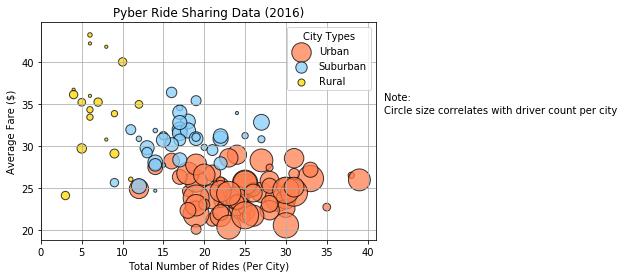

In [42]:
color_one = "coral"
color_two = "lightskyblue"
color_three = "gold"
plt.scatter(Urban_rides, Urban_means, marker="o", c = color_one , edgecolors="black",
            s=urban_drivers, label = "Urban", alpha=0.75)
plt.scatter(Sub_rides, Sub_means, marker = "o", c = color_two, edgecolors= "black", s = sub_drivers, label = "Suburban", alpha = 0.75)
plt.scatter(Rural_rides, Rural_means, marker = "o", c = color_three, edgecolors= "black", s = rural_drivers, label ="Rural", alpha = 0.75)

plt.ylim(min(meancities)-1.25, max(meancities)+1.5)
plt.xlim(0,max(totalrides)+2)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#ax = plt(secondary_y = "Note: Circle size correlates with driver count per city", rotation = 0)
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(loc='upper right', title = "City Types", fancybox = True ,numpoints = 1, fontsize = 10)
plt.grid(True)
plt.text(42,35.5,"Note:")
plt.text(42,34, "Circle size correlates with driver count per city")
plt.savefig("../Images/Citybubbles.png")
plt.show()

#Plot looks good but can't configure the bubble colors or the legend correctly

## Bubble Plot of Ride Sharing Data

In [29]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


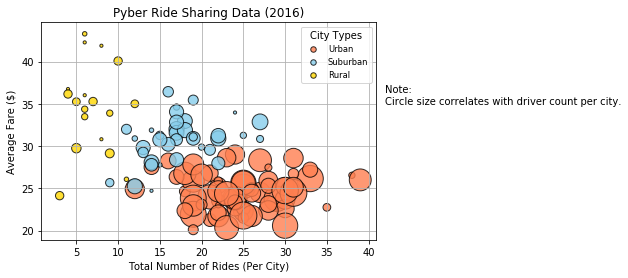

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


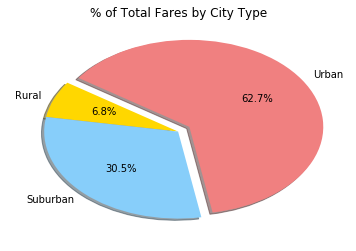

<Figure size 432x288 with 0 Axes>

In [32]:
Urban_variable = combined_cityride_df.loc[combined_cityride_df["Type"] == "Urban", :]
USum = Urban_variable["Fare"].sum()
#USum commented out because it was tested, not needed after, applies to all comments to follow

Sub_variable = combined_cityride_df.loc[combined_cityride_df["Type"] == "Suburban", :]
SSum = Sub_variable["Fare"].sum()
#SSum

Rural_variable = combined_cityride_df.loc[combined_cityride_df["Type"] == "Rural", :]
RSum = Rural_variable["Fare"].sum()
#RSum

Totalsum = RSum + SSum + USum
#Totalsum

Upercent = USum / Totalsum
Spercent = SSum / Totalsum
Rpercent = RSum / Totalsum
#[Upercent, Spercent, Rpercent]


city_types = ["Urban", "Rural", "Suburban"]
percents = [Upercent, Rpercent, Spercent]
colors = ["lightcoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type")
plt.pie(percents, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
#plt.axis("equal")
plt.show()
plt.savefig("../Images/Citypercents.png")
plt.show()








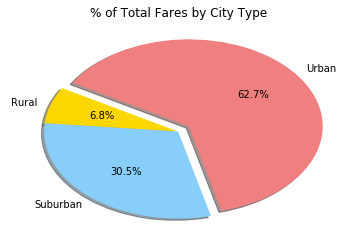

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

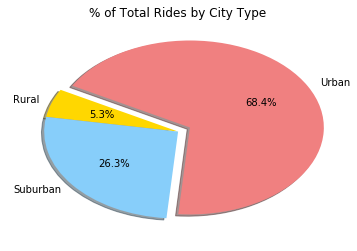

<Figure size 432x288 with 0 Axes>

In [33]:
Urban_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Urban", :]
USum2 = Urban_variable2["Type"].count()
#USum2

Sub_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Suburban", :]
SSum2 = Sub_variable2["Type"].count()
#SSum2

Rural_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Rural", :]
RSum2 = Rural_variable2["Type"].count()
#RSum2

Totalsum2 = RSum2 + SSum2 + USum2
#Totalsum2

Upercent2 = USum2 / Totalsum2
Spercent2 = SSum2 / Totalsum2
Rpercent2 = RSum2 / Totalsum2
#[Upercent2, Spercent2, Rpercent2]


city_types = ["Urban", "Rural", "Suburban"]
percents = [Upercent2, Rpercent2, Spercent2]
colors = ["lightcoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.title("% of Total Rides by City Type")
plt.pie(percents, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=265)
#plt.axis("equal")
plt.show()
plt.savefig("../Images/Ridespercents.png")
plt.show()



In [34]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [35]:
# Show Figure
plt.show()

## Total Drivers by City Type

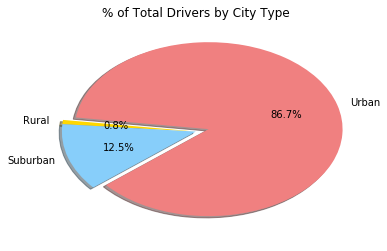

<Figure size 432x288 with 0 Axes>

In [36]:
Urban_variable23 = combined_cityride_df[combined_cityride_df["Type"] == "Urban"] 
USum23 = Urban_variable23["Driver Count"].sum()
#USum23

Sub_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] != "Urban") & 
                                            (combined_cityride_df["Type"] == "Suburban") & 
                                            (combined_cityride_df["Type"] != "Rural")] 
SSum23 = Sub_variable23["Driver Count"].sum()
#SSum23

Rural_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] != "Urban") & 
                                            (combined_cityride_df["Type"] != "Suburban") & 
                                            (combined_cityride_df["Type"] == "Rural")] 
RSum23 = Rural_variable23["Driver Count"].sum()
#RSum23


Totalsum23 = RSum23 + SSum23 + USum23
#Totalsum23


Upercent23 = USum23 / Totalsum23
Spercent23 = SSum23 / Totalsum23
Rpercent23 = RSum23 / Totalsum23
#[Upercent23, Spercent23, Rpercent23]


city_types = ["Urban", "Rural", "Suburban"]
percents = [Upercent23, Rpercent23, Spercent23]
colors = ["lightcoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.title("% of Total Drivers by City Type")
plt.pie(percents, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
#plt.axis("equal")
plt.show()
plt.savefig("../Images/Driverpercents.png")
plt.show()













In [37]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


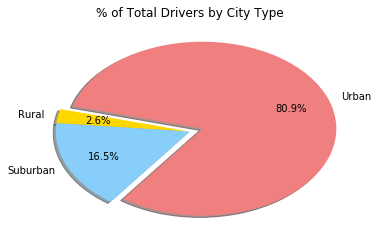

In [6]:
# Show Figure
plt.show()